# Genetic Algorithm for Finding the Best Soccer Lineup

#### Soheil Salemi

In this notebook, I use a genetic algorithm (GA) to find the best soccer lineup. The goal is to choose the best players based on their skills and fit them into a specific formation. The algorithm will try to find the lineup with the highest total skill score.

In [1]:
import random
import matplotlib.pyplot as plt


# Experiment 1: Experiment with The Simple and Small Size of Data 

## Setting Up the Data
Each player is defined by their skills (like speed, strength, and accuracy) and has a unique name (ID). These skills will be used in evaluating the fitness of a team.

In [2]:
soccer_players = [
    {'skills': (80, 85, 75, 90, 70), 'name': "1"},
    {'skills': (78, 80, 85, 88, 75), 'name': "2"},
    {'skills': (82, 78, 80, 85, 80), 'name': "3"},
    {'skills': (75, 88, 82, 80, 77), 'name': "4"},
    {'skills': (81, 86, 76, 90, 76), 'name': "5"},
    {'skills': (82, 87, 77, 90, 72), 'name': "6"},
    {'skills': (84, 89, 79, 90, 74), 'name': "7"}
]

## Set Parameters for the Genetic Algorithm

- `population_size`: The number of teams in each generation.
- `num_generations`: The number of iterations or cycles the algorithm will run.
- `mutation_rate`: The probability of introducing a random change in a team.

In [3]:
population_size = 10
num_generations = 50
mutation_rate = 0.1

## Fitness Function
The **fitness** function calculates the fitness of a team by summing up all players’ skill values. A higher sum means a better team.


In [4]:
def soccer_fitness(team):
    return sum(sum(player['skills']) for player in team)

## Population
This function creates an initial population of teams, each consisting of three randomly chosen players from the list of soccer_players.

In [5]:

def init_soccer_population():
    return [random.sample(soccer_players, 3) for _ in range(population_size)]

## Selection Function

The selection function sorts teams based on their fitness scores and selects the top 50% for the next generation, ensuring only the best teams are retained for further improvement.

In [6]:
def select_for_soccer(population):
    population.sort(key=soccer_fitness, reverse=True)
    return population[:len(population) // 2]

## Crossover Function
The crossover function combines players from two parent teams to create a child team. The random.sample ensures the child team has three unique players.

In [7]:
def crossover(parent1, parent2):
    return random.sample(parent1 + parent2, 3)

## Mutation Function

The mutation function introduces variety by replacing a random player in the team with another player not already in the team. This helps avoid stagnation by adding new variations.

In [8]:
def mutate_soccer(team):
    if random.random() < mutation_rate:
        team[random.randint(0, 2)] = random.choice([p for p in soccer_players if p not in team])
    return team

## Main Genetic Algorithm for Team Selection
This main function combines all previous functions to simulate the genetic algorithm:

	1.	Initialize a population of random teams.
	2.	Select the best teams.
	3.	Create Offspring through crossover and apply mutations.
	4.	Evaluate Fitness and find the best team in each generation.
	5.	Plot Fitness Evolution to visualize improvements over generations.

In [9]:
# Main GA function to evolve teams over generations
def soccer_genetic_algorithm():
    population = init_soccer_population()
    best_teams_over_generations = []

    for generation in range(num_generations):
        selected = select_for_soccer(population)
        offspring = []
        while len(offspring) < population_size:
            parent1, parent2 = random.sample(selected, 2)
            child = mutate_soccer(crossover(parent1, parent2))
            offspring.append(child)

        population = offspring
        best_team = max(population, key=soccer_fitness)
        best_teams_over_generations.append((generation, soccer_fitness(best_team)))
        print(f"Generation {generation + 1}: Best Team - {[(p['skills']) for p in best_team]}, Fitness - {soccer_fitness(best_team)}")

    # Plotting the fitness evolution
    generations, fitness_scores = zip(*best_teams_over_generations)
    plt.plot(generations, fitness_scores)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness Score")
    plt.title("Evolution of Best Team Fitness")
    plt.show()

    return best_team

##  Run the Genetic Algorithm and Display Results
The algorithm runs for the specified number of generations. At the end, it displays the team with the highest fitness score and its cumulative skill value.

Generation 1: Best Team - [(84, 89, 79, 90, 74), (78, 80, 85, 88, 75), (81, 86, 76, 90, 76)], Fitness - 1231
Generation 2: Best Team - [(84, 89, 79, 90, 74), (84, 89, 79, 90, 74), (81, 86, 76, 90, 76)], Fitness - 1241
Generation 3: Best Team - [(81, 86, 76, 90, 76), (84, 89, 79, 90, 74), (84, 89, 79, 90, 74)], Fitness - 1241
Generation 4: Best Team - [(84, 89, 79, 90, 74), (81, 86, 76, 90, 76), (84, 89, 79, 90, 74)], Fitness - 1241
Generation 5: Best Team - [(84, 89, 79, 90, 74), (84, 89, 79, 90, 74), (81, 86, 76, 90, 76)], Fitness - 1241
Generation 6: Best Team - [(84, 89, 79, 90, 74), (84, 89, 79, 90, 74), (84, 89, 79, 90, 74)], Fitness - 1248
Generation 7: Best Team - [(84, 89, 79, 90, 74), (84, 89, 79, 90, 74), (84, 89, 79, 90, 74)], Fitness - 1248
Generation 8: Best Team - [(84, 89, 79, 90, 74), (84, 89, 79, 90, 74), (84, 89, 79, 90, 74)], Fitness - 1248
Generation 9: Best Team - [(84, 89, 79, 90, 74), (84, 89, 79, 90, 74), (84, 89, 79, 90, 74)], Fitness - 1248
Generation 10: Best

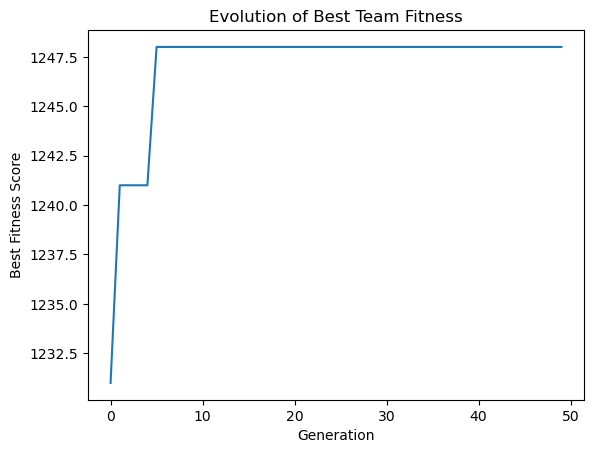


Overall Best Team: [(84, 89, 79, 90, 74), (84, 89, 79, 90, 74), (84, 89, 79, 90, 74)]
Overall Best Fitness: 1248


In [10]:
# Run the genetic algorithm
best_soccer_team = soccer_genetic_algorithm()
print("\nOverall Best Team:", [(p['skills']) for p in best_soccer_team])
print("Overall Best Fitness:", soccer_fitness(best_soccer_team))



# Expriment 2: Experiment with Adding Position to Data

In this experiment added the position for players to make more real. Then after adding positions to
players, I needed to change every function to work based on team formation.

## Setting Up the Data with position

Each player has a set of skills (five numbers) and a position (like forward, midfielder, defender, or goalkeeper). I also set up the team formation, which tells how many players are needed in each position.

In [11]:
# Sample data: Each soccer player is represented by skills and their position
soccer_players = [
    {'skills': (89, 89, 79, 90, 74), 'position': 'forward', 'name': "A"},
    {'skills': (80, 85, 75, 90, 70), 'position': 'forward', 'name': "B"},
    {'skills': (78, 80, 85, 88, 75), 'position': 'midfielder', 'name': "C"},
    {'skills': (82, 78, 80, 85, 80), 'position': 'defender', 'name': "D"},
    {'skills': (75, 88, 82, 80, 77), 'position': 'goalkeeper', 'name': "E"},
    {'skills': (81, 86, 76, 90, 76), 'position': 'forward', 'name': "F"},
    {'skills': (79, 83, 84, 89, 78), 'position': 'midfielder', 'name': "H"},
    {'skills': (83, 79, 81, 87, 81), 'position': 'defender', 'name': "I"},
    {'skills': (82, 87, 77, 90, 72), 'position': 'forward', 'name': "J" },
    {'skills': (80, 82, 87, 90, 77), 'position': 'midfielder', 'name': "K"},
    {'skills': (85, 81, 83, 88, 83), 'position': 'defender', 'name': "L"},
    {'skills': (84, 89, 79, 90, 74), 'position': 'forward', 'name': "M"},
    # ... more players
    {'skills': (89, 89, 79, 90, 74), 'position': 'forward', 'name': "n"},
    {'skills': (80, 85, 75, 90, 70), 'position': 'forward', 'name': "o"},
    {'skills': (78, 80, 85, 88, 75), 'position': 'midfielder', 'name': "p"},
    {'skills': (82, 78, 80, 85, 80), 'position': 'defender', 'name': "Da"},
    {'skills': (75, 88, 82, 80, 77), 'position': 'goalkeeper', 'name': "Eda"},
    {'skills': (81, 86, 76, 90, 76), 'position': 'forward', 'name': "xzsaF"},
    {'skills': (79, 83, 84, 89, 78), 'position': 'midfielder', 'name': "Hsac"},
    {'skills': (83, 79, 81, 87, 81), 'position': 'defender', 'name': "safI"},
    {'skills': (82, 87, 77, 90, 72), 'position': 'forward', 'name': "asJ" },
    {'skills': (80, 82, 87, 90, 77), 'position': 'midfielder', 'name': "adK"},
    {'skills': (85, 81, 83, 88, 83), 'position': 'defender', 'name': "adL"},
    {'skills': (84, 89, 79, 90, 74), 'position': 'forward', 'name': "adM"},
    {'skills': (51, 69, 59, 56, 59), 'position': 'forward', 'name': 'Dkpuci'},
    {'skills': (78, 72, 63, 71, 72), 'position': 'forward', 'name': 'Omg'},
    {'skills': (59, 68, 76, 65, 65), 'position': 'goalkeeper', 'name': 'Ylywzi'},
    {'skills': (53, 62, 65, 77, 62), 'position': 'goalkeeper', 'name': 'Zk'},
    {'skills': (67, 67, 64, 55, 56), 'position': 'midfielder', 'name': 'Fhn'},
    {'skills': (67, 74, 56, 60, 66), 'position': 'midfielder', 'name': 'Ndnrmi'},
    {'skills': (57, 52, 75, 70, 74), 'position': 'defender', 'name': 'Xbaqi'},
    {'skills': (79, 66, 56, 60, 58), 'position': 'defender', 'name': 'Ahoby'},
    {'skills': (79, 50, 66, 61, 53), 'position': 'midfielder', 'name': 'Cee'},
    {'skills': (63, 65, 52, 59, 79), 'position': 'defender', 'name': 'Qkejev'},
    {'skills': (51, 58, 50, 67, 65), 'position': 'forward', 'name': 'Nfw'},
    ]

# Team Formation Rules
team_formation = {'goalkeeper': 1, 'defender': 4, 'midfielder': 3, 'forward': 3}

## Change Structure of Fitness Function to Work with Position 

This fitness function calculates how good a team is. It adds up the skills of all players in the team but only if the team follows the correct formation. If the formation is not correct, the score will be zero.

In [12]:
# Fitness Function considering skills and positions
def soccer_fitness(team):
    skill_score = sum(sum(player['skills']) for player in team)
    position_balance = True

    # Count the number of players in each position in the team
    position_counts = {position: 0 for position in team_formation}
    for player in team:
        position_counts[player['position']] += 1

    # Check if the team matches the formation
    for position, count in team_formation.items():
        if position_counts[position] != count:
            position_balance = False
            break

    return skill_score if position_balance else 0

## Change Structure of Population to Work with Position
This population create the first group of teams randomly. These teams follow the rules of the formation that we set earlier. 

In [13]:
def init_soccer_population():
    population = []
    for _ in range(population_size):
        team = []
        for position, count in team_formation.items():
            team.extend(random.sample([p for p in soccer_players if p['position'] == position], count))
        population.append(team)
    return population

## Selection, Crossover, and Mutation for Experiment 2

In [14]:
# Selection Function for Soccer Team Formation
def select_for_soccer(population):
    population.sort(key=soccer_fitness, reverse=True)
    return population[:len(population) // 2]

# Crossover Function with position adherence
def crossover(parent1, parent2):
    child = []
    for position in team_formation:
        parent = random.choice([parent1, parent2])
        child.extend([p for p in parent if p['position'] == position])
    return child

# Mutation Function for Soccer Team Formation
def mutate_soccer(team):
    if random.random() < mutation_rate:
        position_to_mutate = random.choice(list(team_formation.keys()))
        player_indices = [i for i, p in enumerate(team) if p['position'] == position_to_mutate]
        if player_indices:
            player_to_replace_idx = random.choice(player_indices)
            eligible_players = [p for p in soccer_players if p['position'] == position_to_mutate and p not in team]
            if eligible_players:
                new_player = random.choice(eligible_players)
                team[player_to_replace_idx] = new_player
    return team

## Running the Genetic Algorithm to text experiment 2

Now, I run the algorithm for a set number of generations. In each generation, I choose the best teams, create new teams from them, and possibly make random changes (mutations) to see if a better lineup can be found.

In [15]:
# Main Genetic Algorithm for Soccer Team Formation
y = []
x = []
def soccer_genetic_algorithm():
    population = init_soccer_population()

    for generation in range(num_generations):
        selected = select_for_soccer(population)
        offspring = []
        while len(offspring) < population_size:
            parent1, parent2 = random.sample(selected, 2)
            child = crossover(parent1, parent2)
            offspring.append(mutate_soccer(child))

        population = offspring
        best_team = max(population, key=soccer_fitness)
        print(f"Generation {generation + 1}: Best Team - {best_team}, Fitness - {soccer_fitness(best_team)}")
        y.append(soccer_fitness(best_team))
        x.append(generation)

    return max(population, key=soccer_fitness)

# Run the Genetic Algorithm for Soccer Team Formation
best_soccer_team = soccer_genetic_algorithm()
print("\nBest Soccer Team Overall:", best_soccer_team, "\nFitness Score:", soccer_fitness(best_soccer_team))

Generation 1: Best Team - [{'skills': (75, 88, 82, 80, 77), 'position': 'goalkeeper', 'name': 'Eda'}, {'skills': (63, 65, 52, 59, 79), 'position': 'defender', 'name': 'Qkejev'}, {'skills': (85, 81, 83, 88, 83), 'position': 'defender', 'name': 'adL'}, {'skills': (83, 79, 81, 87, 81), 'position': 'defender', 'name': 'I'}, {'skills': (83, 79, 81, 87, 81), 'position': 'defender', 'name': 'safI'}, {'skills': (67, 74, 56, 60, 66), 'position': 'midfielder', 'name': 'Ndnrmi'}, {'skills': (80, 82, 87, 90, 77), 'position': 'midfielder', 'name': 'adK'}, {'skills': (79, 83, 84, 89, 78), 'position': 'midfielder', 'name': 'H'}, {'skills': (80, 85, 75, 90, 70), 'position': 'forward', 'name': 'B'}, {'skills': (82, 87, 77, 90, 72), 'position': 'forward', 'name': 'asJ'}, {'skills': (82, 87, 77, 90, 72), 'position': 'forward', 'name': 'J'}], Fitness - 4330
Generation 2: Best Team - [{'skills': (75, 88, 82, 80, 77), 'position': 'goalkeeper', 'name': 'Eda'}, {'skills': (85, 81, 83, 88, 83), 'position': 'de

## Visualizing the Results

I use a plot to show how the fitness score changes across generations. This helps me see if the algorithm is improving the team lineup over time.

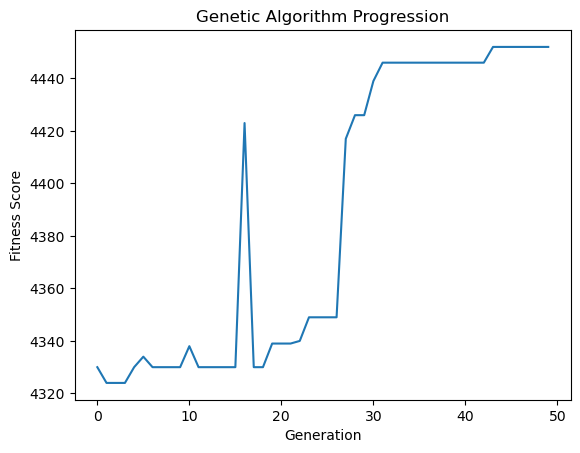

In [17]:
plt.plot(x, y)
plt.xlabel("Generation")
plt.ylabel("Fitness Score")
plt.title("Genetic Algorithm Progression")
plt.show()

# Experiment 3:  Experiment with Uniform Crossover and Swap Mutation

Here, I test a different crossover (uniform) and mutation (swap) method. Uniform crossover randomly selects each player from one of the parents, and swap mutation switches two players within the team. This adds diversity to the gene pool.

In [18]:
def uniform_crossover(parent1, parent2):
    # Uniform crossover selects each player from one of the parents randomly
    return [random.choice([p1, p2]) for p1, p2 in zip(parent1, parent2)]

def swap_mutation(team):
    # Swap mutation swaps two random players in the team
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(team)), 2)
        team[idx1], team[idx2] = team[idx2], team[idx1]
    return team

# Run GA with uniform crossover and swap mutation
best_team_uniform_crossover = soccer_genetic_algorithm()
print("\nBest Soccer Team Overall:", best_soccer_team, "\nFitness Score:", soccer_fitness(best_soccer_team))

Generation 1: Best Team - [{'skills': (75, 88, 82, 80, 77), 'position': 'goalkeeper', 'name': 'E'}, {'skills': (85, 81, 83, 88, 83), 'position': 'defender', 'name': 'adL'}, {'skills': (82, 78, 80, 85, 80), 'position': 'defender', 'name': 'Da'}, {'skills': (83, 79, 81, 87, 81), 'position': 'defender', 'name': 'safI'}, {'skills': (85, 81, 83, 88, 83), 'position': 'defender', 'name': 'L'}, {'skills': (78, 80, 85, 88, 75), 'position': 'midfielder', 'name': 'C'}, {'skills': (79, 83, 84, 89, 78), 'position': 'midfielder', 'name': 'Hsac'}, {'skills': (80, 82, 87, 90, 77), 'position': 'midfielder', 'name': 'adK'}, {'skills': (84, 89, 79, 90, 74), 'position': 'forward', 'name': 'M'}, {'skills': (81, 86, 76, 90, 76), 'position': 'forward', 'name': 'xzsaF'}, {'skills': (80, 85, 75, 90, 70), 'position': 'forward', 'name': 'o'}], Fitness - 4518
Generation 2: Best Team - [{'skills': (75, 88, 82, 80, 77), 'position': 'goalkeeper', 'name': 'E'}, {'skills': (82, 78, 80, 85, 80), 'position': 'defender',

# Conclusion

As observed in the experiment, the first crossover and mutation seem to achieve a higher fitness score
compared to the uniform crossover and swap mutation. Hence, can say this shows that the first crossover
and mutation are better at finding a more optimal solution in the given problem space.
Another conclusion for this experiment is that the first crossover and mutation show a more consistent
improvement over generations. However, the uniform crossover and swap mutation results in a more
erratic progression with less overall improvement.
Additionally, this experiment indicates that the first crossover and mutation methods may be more
efficient for this specific problem in this project because they achieve higher fitness scores. Moreover,
this could be because of the better exploitation of good genes when they appear in the population.
One thing that needs to be mentioned here is that It is important to be aware that genetic algorithms are
highly dependent on the specifics of the problem being solved. Therefore, it is possible that the uniform
crossover and swap mutation could perform better in a different problem or with a different fitness
landscape.
In summary, by observing this experiment can understand that the first crossover and mutation methods
seem to outperform the uniform crossover and swap mutation in this specific example.